In [184]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import colorsys
import numpy as np
import matplotlib.colors as mc

In [2]:
colors = ['#ccece6', '#99d8c9', '#66c2a4', '#41ae76', '#238b45', '#006d2c', '#00441b']

In [110]:
def hex_to_rgb(hexval):
    d = hexval.strip('#')
    rgb = [int(d[x:x+2], 16) for x in range(0, len(d), 2)]
    return rgb

def rgb_to_hex(rgb):
    #decide if rgbs are floating points between 0 or 1
    if all((val >= 0) and (val<=1) and isinstance(val, float) for val in rgb):
        #convert to values within 255
        rgb = [int(x*255) for x in rgb]
    if all((val >= 0) and (val<=255) for val in rgb):
        return "#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[1]),int(rgb[2]))
    else:
        raise ValueError("rgb values should be within 0-255")

def rgb_to_hls(rgbval):
    h, l, s = colorsys.rgb_to_hls(rgbval[0]/float(255), rgbval[1]/float(255), rgbval[2]/float(255))
    return [h, l, s]

def hls_to_rgb(hls):
    rgb = colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
    rgb = [int(x*255) for x in rgb]
    return rgb

In [143]:
def brighten(color, fraction=0.05):
    
    rgbval = hex_to_rgb(color)
    hls = rgb_to_hls(rgbval)
    
    #now adjust luminescence - 
    hls[1] =min((1+fraction)*hls[1], 1)
    
    rgb = colorsys.hls_to_rgb(hls[0], hls[1], hls[2])
    hexv = rgb_to_hex(rgb)
    return hexv

In [144]:
def mix_colors(color1, color2, ratio=0.5):
    
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    
    rgb = [ratio*rgb1[x] + (1-ratio)*rgb2[x] for x in range(3)]
    hexv = rgb_to_hex(rgb)
    
    return hexv

In [177]:
def find_intermediate_colors(color1, color2, colors=1, ignore_edges=False):

    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)

    #now find intermediate points
    rpoints = np.linspace(rgb1[0], rgb2[0], colors+2)
    gpoints = np.linspace(rgb1[1], rgb2[1], colors+2)
    bpoints = np.linspace(rgb1[2], rgb2[2], colors+2)
    
    #stack to pairs
    if ignore_edges:
        new_rgbs = np.stack((rpoints[1:-1], gpoints[1:-1], bpoints[1:-1]), axis=-1)
    else:
        new_rgbs = np.stack((rpoints, gpoints, bpoints), axis=-1)
    
    #convert to hexvals
    hexvals = [rgb_to_hex(rgb) for rgb in new_rgbs]
    return hexvals

In [185]:
def create_colormap(colors):
    cmap = mc.LinearSegmentedColormap.from_list("", colors)
    return cmap

In [112]:
def plot_colors(colors):
    fig = plt.figure(figsize=[len(colors), 1.5])
    spec = gridspec.GridSpec(ncols=len(colors), nrows=2, figure=fig)

    for count, color in enumerate(colors):
        ax1 = fig.add_subplot(spec[0, count])
        ax1.fill([0,1,1,0],[0,0,1,1], color=color)
        ax1.set_ylim(0,1)
        ax1.set_xlim(0,1)
        plt.axis("off") 
        ax2 = fig.add_subplot(spec[1, count])
        ax2.plot([0,1],[0.25,0.25], color=color, linewidth=3)
        ax2.set_ylim(0,0.5)
        ax2.set_xlim(0,0.5)
        plt.axis("off") 
    plt.subplots_adjust(wspace=0, hspace=0)

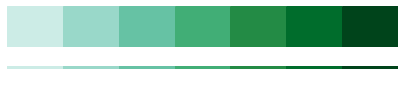

In [113]:
plot_colors(colors)

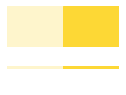

In [172]:
dcolor = brighten('#FDD835', 0.5)
ar = [dcolor, '#FDD835']
plot_colors(ar)

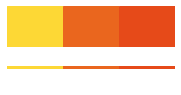

In [150]:
y1 = '#FDD835'
y2 = '#E64A19'
y3 = mix_colors(y1, y2, 0.2)
plot_colors([y1, y3, y2])

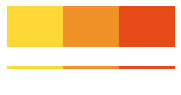

In [180]:
y1 = '#FDD835'
y2 = '#E64A19'
y3 = find_intermediate_colors(y1, y2, 1)
plot_colors(y3)

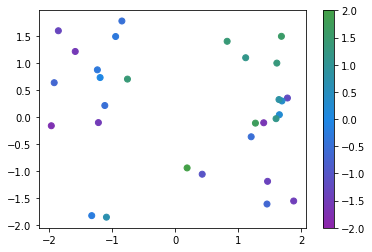